In [1]:
from transformers import AutoModel
model = AutoModel.from_pretrained("DeepPavlov/distilrubert-tiny-cased-conversational-v1")

Downloading:   0%|          | 0.00/175 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.7M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/distilrubert-tiny-cased-conversational-v1 were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [67]:
AutoModel.from_pretrained('sberbank-ai/rugpt3small_based_on_gpt2')

Downloading:   0%|          | 0.00/608 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/526M [00:00<?, ?B/s]

Some weights of the model checkpoint at sberbank-ai/rugpt3small_based_on_gpt2 were not used when initializing GPT2Model: ['lm_head.weight']
- This IS expected if you are initializing GPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


GPT2Model(
  (wte): Embedding(50264, 768)
  (wpe): Embedding(2048, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0): GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (1): GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP

In [68]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('sberbank-ai/rugpt3small_based_on_gpt2')
model = GPT2LMHeadModel.from_pretrained('sberbank-ai/rugpt3small_based_on_gpt2')

Downloading:   0%|          | 0.00/1.63M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

In [51]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained("sberbank-ai/ruT5-base")
model = T5ForConditionalGeneration.from_pretrained("sberbank-ai/ruT5-base")

Downloading:   0%|          | 0.00/980k [00:00<?, ?B/s]

In [88]:
text = """Пользователь 1: Привет, как дела?
Пользователь 2: Привет, всё хорошо.
Пользователь 1: Чем занимаешься?
"""
inputs = tokenizer(text, return_tensors='pt')
with torch.no_grad():
    hypotheses = model.generate(
        **inputs, 
        do_sample=True, num_return_sequences=3, num_beams=15,
        repetition_penalty=2.5, temperature=1.9, top_k=500,
        max_new_tokens=32, return_dict_in_generate=True, output_scores=True, early_stopping=True
    )

for t in hypotheses.sequences:
    print(tokenizer.decode(t, skip_special_tokens=True))
    print("========================================")
print(hypotheses.sequences_scores)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Пользователь 1: Привет, как дела?
Пользователь 2: Привет, всё хорошо.
Пользователь 1: Чем занимаешься?
Пользователь 2: Спойлер нажми!
Пользователь 3: На что ты учишь язык?
Пользователь 4: Слушай
Пользователь 1: Привет, как дела?
Пользователь 2: Привет, всё хорошо.
Пользователь 1: Чем занимаешься?
Пользователь 2: Вот я и вернулся!
Пользователь 2: Здравствуйте, а ЧЕМУ ОТКРЫТ АКБ?
Польз
Пользователь 1: Привет, как дела?
Пользователь 2: Привет, всё хорошо.
Пользователь 1: Чем занимаешься?
Пользователь 2: Устроился в свою контору (помогите с поиском вакансий по запросу "киндер") В общей сложности на данный момент более
tensor([-0.0413, -0.0077, -0.0575])


In [11]:
pipe("""Us1: Привет, как дела?\n\n
Us2: Привет, всё хорошо.\n\n
Us1: Чем занимаешься?\n\n
""")

[{'generated_text': 'Хорошо.'}]

In [11]:
from typing import Iterable

In [13]:
isinstance("kjafsklja", Iterable)

True

In [23]:
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained("cointegrated/rut5-small-chitchat")

In [2]:
tokenizer.decode(tokenizer.encode("""Привет, ты как?\n\n
Здорово. Так себе.\n\n
А что случилось?\n\n 
"""), ignore_special_tokens=False)

'Привет, ты как? Здорово. Так себе. А что случилось?</s>'

In [2]:
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer

class MLChitChat:
    def __init__(self) -> None:
        self.tokenizer = T5Tokenizer.from_pretrained("cointegrated/rut5-small-chitchat")
        self.generator = T5ForConditionalGeneration.from_pretrained("cointegrated/rut5-small-chitchat")
        self.ret_seq = 5

    def __call__(self, texts) -> None:
        inputs = self.tokenizer(texts, return_tensors='pt', padding=True)
        with torch.no_grad():
            hypotheses = self.generator.generate(
                **inputs, 
                do_sample=True, num_beams=3, num_return_sequences=self.ret_seq,
                repetition_penalty=2.5, top_k=500, temperature=1.13,
                max_length=54, output_scores=True, return_dict_in_generate=True
            )

        ans_di = {}
        tmp_li = []
        hypotheses = zip(hypotheses.sequences, hypotheses.sequences_scores)
        for i, (tens, score) in enumerate(hypotheses):
            tmp_li.append((self.tokenizer.decode(tens, skip_special_tokens=True), score.item()))
            if (i+1) % self.ret_seq == 0:
                ans_di.update({(i+1)//self.ret_seq:tmp_li})
                tmp_li = []
        return ans_di

In [3]:
model = MLChitChat()

In [25]:
text = ["""Привет, как дела?\n\n
Привет, всё хорошо)\n\n
""",
"""Привет, ты как?\n\n
Здорово. Так себе.\n\n
А что случилось?\n\n 
""",
"""Привет, ты как? ))\n\n
Здорово. Так себе (\n\n
А что случилось :(\n\n 
"""]
model(text)

{1: [('Привет, спасибо.', -0.8036027550697327),
  ('Привет, спасибо за помощь! Как у тебя все в порядке?',
   -0.40717342495918274),
  ('Привет, теперь все в порядке!', -0.6237233877182007),
  ('хорошо, у тебя тоже все будет в порядке?', -0.5728853344917297)],
 2: [('Мне так жаль это слышать.', -0.39720630645751953),
  ('Что случилось?', -0.5411677360534668),
  ('Ничего, ничего.', -0.4679516553878784),
  ('О, ничего не случилось.', -0.4578409790992737)],
 3: [('Что случилось?', -0.4788780212402344),
  ('Здорово, я рад тебя видеть.', -0.5614637732505798),
  ('Что случилось?', -0.4788780212402344),
  ('Что случилось?', -0.4788780212402344)]}

In [29]:
text = """Привет, как дела?\n\n
Привет, всё хорошо.\n\n
Чем занимаешься?\n\n 
"""
model(text)

{1: [('Пытаюсь кое-что попробовать.', -0.513427197933197),
  ('Похоже, я занимаюсь спортом.', -0.4895842373371124),
  ('Я ничем не занимаюсь.', -0.31862208247184753),
  ('Работаю.', -0.4969412684440613),
  ('Всего лишь на работе. Должно быть, тебе нужна помощь.',
   -0.44850507378578186)]}

In [75]:
import pandas as pd

chats = pd.read_csv("TlkPersonaChatRus/dialogues.tsv", sep='\t')
chats

,persona_1_profile,persona_2_profile,dialogue
0,<span class=participant_1>У меня любимая работ...,<span class=participant_2>Ищу принца.<br />Вед...,<span class=participant_2>Пользователь 2: Прив...
1,<span class=participant_1>Я работаю учителем<b...,<span class=participant_2>Я бизнесмен<br />У м...,<span class=participant_1>Пользователь 1: Прив...
2,<span class=participant_1>Я купила дом<br />Я ...,<span class=participant_2>Я пою в караоке<br /...,<span class=participant_1>Пользователь 1: Прив...
3,<span class=participant_1>я врач и женат<br />...,<span class=participant_2>Я мальчик<br />Я учу...,<span class=participant_2>Пользователь 2: Здра...
4,<span class=participant_1>Я школьница.<br />Я ...,<span class=participant_2>Я простоват.<br />Лю...,<span class=participant_1>Пользователь 1: Прив...
...,...,...,...
10008,<span class=participant_1>У меня 6 собак.<br /...,<span class=participant_2>Я музыкант.<br />Люб...,"""<span class=participant_1>Пользователь 1: При..."
10009,<span class=participant_1>Я верная.<br />Мне н...,<span class=participant_2>Я люблю рок<br />Пиш...,<span class=participant_1>Пользователь 1: Прив...
10010,<span class=participant_1>Я студент.<br />Я уч...,<span class=participant_2>Директор турфирмы.<b...,<span class=participant_1>Пользователь 1: Прив...
10011,<span class=participant_1>Моя мама живет со мн...,<span class=participant_2>Я воспитатель<br />л...,<span class=participant_1>Пользователь 1: Прив...


In [76]:
chats['dialogue'] = chats['dialogue'].str.replace("</span><br />", "\n\n")
chats['dialogue'] = chats['dialogue'].str.replace("<span class=participant_2>", "")
chats['dialogue'] = chats['dialogue'].str.replace("<span class=participant_1>", "")
chats['dialogue'] = chats['dialogue'].str.replace("<br />", "")
chats['dialogue']

0        Пользователь 2: Привет) расскажи о себе\n\nПол...
1        Пользователь 1: Привет!\n\nПользователь 2: При...
2        Пользователь 1: Привет\n\nПользователь 1: Как ...
3        Пользователь 2: Здравствуйте\n\nПользователь 2...
4        Пользователь 1: Привет!\n\nПользователь 2: При...
                               ...                        
10008    "Пользователь 1: Привет\n\nПользователь 2: При...
10009    Пользователь 1: Привет)\n\nПользователь 1: Как...
10010    Пользователь 1: Привет\n\nПользователь 2: прив...
10011    Пользователь 1: Приветик)\n\nПользователь 2: П...
10012    Пользователь 2: Привет! рада новому знакомству...
Name: dialogue, Length: 10013, dtype: object

<AxesSubplot:>

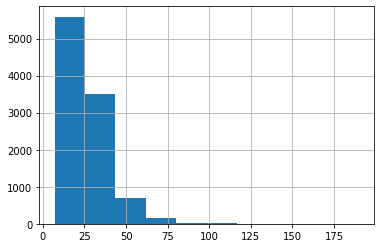

In [5]:
chats['dialogue'].str.split('\n\n').apply(lambda x: len(x)).hist()

In [6]:
%timeit model(chats['dialogue'].sample(10).to_list())

/home/sirily/guildenstern/.env/lib/python3.8/site-packages/transformers/generation_utils.py:2343: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


1min 2s ± 33.5 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit model(chats['dialogue'].sample(50).to_list())

In [ ]:
%timeit model(chats['dialogue'].sample(25).to_list())

In [3]:
chats['length'] = chats['dialogue'].str.split('\n\n').apply(lambda x: len(x))

In [7]:
%timeit model(chats.loc[chats['length'].between(25, 50), 'dialogue'].sample(15).to_list())

/home/sirily/guildenstern/.env/lib/python3.8/site-packages/transformers/generation_utils.py:2343: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


1min 18s ± 19.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [80]:
from guildenstern.src.libs.models.simple_bot import MLChitChat

model = MLChitChat()

In [81]:
model.config

{'do_sample': True,
 'num_beams': 3,
 'num_return_sequences': 3,
 'repetition_penalty': 2.5,
 'top_k': 500,
 'temperature': 1.11,
 'max_length': 54,
 'output_scores': True,
 'return_dict_in_generate': True}

In [83]:
text = chats['dialogue'].sample(1).to_list()[0]
text

'Пользователь 2: Привет\n\nПользователь 1: О,приветики!Я Наталия,а как вас зовут?\n\nПользователь 2: Меня зовут Андрей, давайте ознакомиться\n\nПользователь 2: Знакомиться\n\nПользователь 1: С удовольствием! чем занимаетесь? может тоже любитеспорт? я без него ни дня не могу! ть\n\nПользователь 2: Я директор магазина, но знаете спорт я тоже обожаю, особенно водный\n\nПользователь 2: Кстати через месяц собираюсь на море поехать\n\nПользователь 2: Вы любите путешествовать?\n\nПользователь 1: Замечатьно как! Путешествовать просто обожаю! Познаватьновое- очень увлекательно. Можно сравнить разве чтос чтением книг! Любите читать?\n\nПользователь 2: Да знаете не особо, если читать то только учебники, по работе, и ещё по испанскому, вот изучаю его, думаюпригодиться\n\nПользователь 2: А у вас есть любимая книга?\n\nПользователь 1: Учебники тоже читаю,я учииельницей работаю.\n\nПользователь 2: Ого, круто, а какой предмет ведёте?\n\nПользователь 1: Есть, Ш. Бронте , Джейн Ейр . Вся про меня, молод

In [85]:
import warnings

warnings.filterwarnings('ignore', message='__floordiv__ is deprecated')

In [87]:
model(text)

[('Мне нравится, что вы напоминаете об этом. Я надеюсь, что мне удалось это понять!',
  -0.5270249247550964),
 ('Привет! Надеюсь, вы сможете найти себя в своем возрасте. Удачи!',
  -0.5724456310272217),
 ('Я никогда не был на работе, и так все будет увлекательно! Пожалуйста!',
  -0.7270546555519104)]

In [26]:
tokenizer = T5Tokenizer.from_pretrained("cointegrated/rut5-small-chitchat")
model = T5ForConditionalGeneration.from_pretrained("cointegrated/rut5-small-chitchat")

In [45]:
text = 'Привет! Расскажи, как твои дела?'
inputs = tokenizer(text, return_tensors='pt')
with torch.no_grad():
    hypotheses = model.generate(
        **inputs, 
        do_sample=True, top_k=500, num_return_sequences=3, num_beams=5,
        top_p=0.95, repetition_penalty=2.5, temperature=1.15,
        max_length=32, return_dict_in_generate=True, output_scores=True
    )

print(tokenizer.batch_decode(hypotheses.sequences, skip_special_tokens=True))
print(hypotheses.sequences_scores)

['Хорошо. Какие у тебя дела?', 'Хорошо.', 'Великолепно. Хорошо.']
tensor([-0.4027, -0.4113, -0.5968])


In [37]:
text = ["""Привет, как дела?\n\n
Привет, всё хорошо.\n\n
Чем занимаешься?\n\n 
""",
"""Привет, ты как?\n\n
Здорово. Так себе.\n\n
А что случилось?\n\n 
"""]
inputs = tokenizer(text, return_tensors='pt', padding=True)
with torch.no_grad():
    hypotheses = model.generate(
        **inputs, 
        do_sample=True, num_beams=3, num_return_sequences=3,
        repetition_penalty=2.5, top_k=500, temperature=1.11,
        max_length=54, output_scores=True, return_dict_in_generate=True
    )
hypotheses = zip(hypotheses.sequences, hypotheses.sequences_scores)
for h, score in hypotheses:
    print(tokenizer.decode(h, skip_special_tokens=True))
    print(score.item())

Да, работаю.
-0.9424518942832947
У меня все хорошо.
-0.7928904294967651
Работаю.
-0.5319557785987854
Что случилось?
-0.5411679744720459
Мне нужно поговорить с тобой.
-0.4335683286190033
Не знаю.
-0.5221830606460571


In [31]:
tokenizer.batch_decode(inputs['input_ids'])

['Привет, как дела? Привет, всё хорошо. Чем занимаешься?</s>',
 'Привет, ты как? Здорово. Так себе. А что случилось?</s> <pad>']

In [4]:
import pandas as pd

In [7]:
adjectives = pd.read_csv('adjectives.csv', sep='\t')['bare'].to_list()

In [9]:
len(adjectives)

11941

In [19]:
nouns = []
with open('nouns_anim_m.txt') as f:
    for line in f.readlines():
        nouns.append(line.strip().replace('\ufeff', ''))

len(nouns)

12450

In [72]:
%%timeit
with open('guildenstern/.resource/nouns.txt') as f:
    nouns = f.readlines()

random.choice(nouns).strip()

1.29 ms ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [62]:
import random

random.choice(adjectives)

'стенной'

In [63]:
random.choice(nouns)

'Коленька'

In [88]:
nicks = []
nicks.append(random.choice(adjectives).strip() + ' ' + random.choice(nouns).strip())

In [1]:
from guildenstern.src.libs.models.nickname_generator import generate_nickname

In [21]:
nick = generate_nickname()
print(nick)
while nick in []:
    nick = generate_nickname()
print(nick)

Эпохальный Вастьянов
Эпохальный Вастьянов


In [68]:
with open('guildenstern/.resource/nouns.txt', 'w') as f:
    f.write('\n'.join([a for a in nouns]))

with open('guildenstern/.resource/adjectives.txt', 'w') as f:
    f.write('\n'.join([a for a in adjectives]))

In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_checkpoint = 'cointegrated/rubert-tiny-toxicity'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/377 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/235k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/457k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/957 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/45.0M [00:00<?, ?B/s]

In [2]:
def text2toxicity(text, aggregate=True):
    """ Calculate toxicity of a text (if aggregate=True) or a vector of toxicity aspects (if aggregate=False)"""
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(model.device)
        proba = torch.sigmoid(model(**inputs).logits).cpu().numpy()
    if isinstance(text, str):
        proba = proba[0]
    if aggregate:
        return 1 - proba.T[0] * (1 - proba.T[-1])
    return proba

In [4]:
print(text2toxicity(['я люблю нигеров', 'я люблю африканцев'], True))

[0.93501186 0.04156357]


In [5]:
print(text2toxicity(['соси хуй', 'от улыбки станет всем светлей', 'пидоры идут'], True))

[0.99914867 0.06166977 0.99970096]


In [6]:
print(text2toxicity(['ля ты крыса', 'заткнись', 'придурок'], True))

[0.9912947  0.08314562 0.99971104]
